In [30]:
#insert all packages needed
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [2]:
#import the smiles list
file_name = "tested_molecules-1.csv"
with open(file_name, "r") as ins:
    smiles = []
    for line in ins:
        smiles.append(line.split('\n')[0])
print('# of SMILES:', len(smiles))

# of SMILES: 1001


In [3]:
#split the csv file into multiple columns
#read the dataframe
df_molecules = pd.read_csv(file_name)

# #split the dataframe
# new_columns = df_molecules['SMILES;ALDH1_inhibition'].str.split(';', expand=True)
# df_molecules = pd.concat([df_molecules, new_columns], axis=1)

# #drop the original column
# df_molecules = df_molecules.drop('SMILES;ALDH1_inhibition', axis=1)

# #rename the column names 
# df_molecules = df_molecules.rename(columns={0:'SMILES',1:'ALDH1_inhibition'})

df_molecules;

In [4]:
#since the list is very large, to try stuff out, we look at the first 4 smiles
only_smiles_list = df_molecules['SMILES']

smiles_tryout = only_smiles_list
smiles_tryout;

In [5]:
#draw the four mole images
mols = [Chem.MolFromSmiles(smi) for smi in smiles_tryout]
#Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [6]:
#calculate descriptor list
desc_list = [n[0] for n in Descriptors._descList]
#print(len(desc_list))
#print(desc_list)

In [7]:
#calculate molecular descriptors and make them floats
calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)

rdkit_desc_data = [calc.CalcDescriptors(m) for m in mols]

rdkit_desc = []
for element in rdkit_desc_data:   
    tuple_floats = tuple(float(x) for x in element)
    rdkit_desc.append(tuple_floats)
    
#print(rdkit_desc_data[0])
#print(rdkit_desc[0])

In [8]:
#add columns to dataframe
for col in range(len(desc_list)):
    column = []
    for row in range(len(rdkit_desc)):
        #the row iteration is for the molecule and the col iteration for the descriptor, this makes a list which will be
        #added to the dataframe
        descriptor = rdkit_desc[row][col]
        column.append(descriptor)
    df_molecules[desc_list[col]] = column
df_molecules = df_molecules.drop(columns=['fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea'])

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
df_molecules

SMILES  ALDH1_inhibition  \
0    COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...                 1   
1               O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1                 1   
2    Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...                 1   
3                    CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1                 1   
4    CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21                 1   
..                                                 ...               ...   
995             COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1                 0   
996                       CCNc1oc(COc2cccc(C)c2)nc1C#N                 0   
997                          NC(=O)Cn1cnc(-c2ccccc2)c1                 0   
998  Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...                 0   
999          O=C(Cn1nnc2c(cnn2-c2ccccc2)c1=O)NCc1cccs1                 0   

     MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0            13.083531       13.083531           0.001173       -0.683140   
1            12.170097       12.170097           0.066966       -0.066966   
2            10.905837       10.905837           0.016881       -0.016881   
3            11.562446       11.562446           0.270607       -0.454447   
4            12.108866       12.108866           0.086947       -3.251317   
..                 ...             ...                ...             ...   
995          12.276695       12.276695           0.095308       -0.234165   
996           8.926724        8.926724           0.197944        0.197944   
997          10.688087       10.688087           0.166502       -0.368508   
998          12.603109       12.603109           0.065686       -0.447592   
999          12.570699       12.570699           0.190808       -0.399579   

          qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0    0.520365  463.542         434.310  463.233188                178.0   
1    0.498564  378.457         360.313  378.115047                136.0   
2    0.382043  477.589         444.325  477.260865                184.0   
3    0.795948  330.609         317.505  328.981818                 96.0   
4    0.687618  419.553         402.417  419.043204                140.0   
..        ...      ...             ...         ...                  ...   
995  0.779148  261.301         244.165  261.123369                100.0   
996  0.891297  257.293         242.173  257.116427                 98.0   
997  0.805927  201.229         190.141  201.090212                 76.0   
998  0.644831  392.441         372.281  392.126674                144.0   
999  0.575368  366.406         352.294  366.089895                130.0   

     NumRadicalElectrons  MaxPartialCharge  MinPartialCharge  \
0                    0.0          0.249868         -0.496477   
1                    0.0          0.230353         -0.467476   
2                    0.0          0.219930         -0.492903   
3                    0.0          0.351723         -0.421732   
4                    0.0          0.231765         -0.301646   
..                   ...               ...               ...   
995                  0.0          0.292020         -0.496766   
996                  0.0          0.235725         -0.483868   
997                  0.0          0.236896         -0.368122   
998                  0.0          0.331704         -0.359541   
999                  0.0          0.280885         -0.349596   

     MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  \
0               0.496477             0.249868          1.088235   
1               0.467476             0.230353          1.111111   
2               0.492903             0.219930          1.228571   
3               0.421732             0.351723          1.333333   
4               0.301646             0.231765          1.296296   
..                   ...                  ...               ...   
995             0.496766             0.292020          1.210526   
996 

In [9]:
#put all the column names of the dataframe in a list
columns = []
for column in df_molecules:
    columns.append(column)
print(columns)

['SMILES', 'ALDH1_inhibition', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_V

In [10]:
#check the correlations between all columns and put the highest correlations in a list
highcorr=[]
allcorr = []
for column1 in range(len(columns)):
    for column2 in range(len(columns)):
        if column1 != column2 and column1>1 and column2>1 and column2>=column1:
            corr = df_molecules[columns[column1]].corr(df_molecules[columns[column2]])
            #print("Correlation between ", columns[column1], " and ", columns[column2], "is: ", round(corr, 2))
            allcorr.append(corr)
            if corr >= 0.80 or corr <= -0.80:
                #all correlations of 0,9 or higher are put in a list
                highcorr.append([columns[column1],columns[column2],round(corr,2)])
#print(highcorr)
#print(len(highcorr))

In [11]:
#put all the columns with high correlation in a list (except the first ones to have the high correlation like MolWt)
dupe_col = []
for i in range(len(highcorr)):
    if highcorr[i][1] not in dupe_col:
        dupe_col.append(highcorr[i][1])
print(len(dupe_col))

40


In [12]:
for i in dupe_col:    
    df_molecules = df_molecules.drop(columns = [i])
#df_molecules

columns_new = []
for descriptor in df_molecules:
    columns_new.append(descriptor)
print(columns_new)

['SMILES', 'ALDH1_inhibition', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'FpDensityMorgan1', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'HallKierAlpha', 'Ipc', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'VSA_ESta

## Remove outliers 

In [13]:
def find_outliers(df, column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    lower_outliers = df[column][(df[column]<(q1-IQR))]
    upper_outliers = df[column][(df[column]>(q3+IQR))]
    frames = [lower_outliers, upper_outliers]
    outliers = pd.concat(frames)
    print(outliers)
    return outliers

In [14]:
#maall descriptors

descriptors = ['MaxAbsEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'MolWt', 'NumRadicalElectrons',
       'MaxPartialCharge', 'MinPartialCharge', 'FpDensityMorgan1',
       'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW',
       'AvgIpc', 'BalabanJ', 'HallKierAlpha', 'Ipc', 'PEOE_VSA1', 'PEOE_VSA10',
       'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2',
       'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2',
       'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8',
       'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12',
       'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA7', 'SlogP_VSA8',
       'SlogP_VSA9', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11',
       'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5',
       'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9',
       'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5',
       'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'FractionCSP3',
       'NHOHCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
       'NumAliphaticRings', 'NumAromaticHeterocycles', 'NumAromaticRings',
       'NumSaturatedHeterocycles', 'RingCount','MolLogP']

#create copy of molecules df without the outliers

no_outliers_df = df_molecules.copy()
def remove_outliers(df, column):
    outliers = find_outliers(df, column)
    df_outliers = pd.DataFrame.from_dict(outliers)
    list_indexes_outliers = list(df_outliers.index.values)
    df_column = df.filter([column], axis=1)
    for i in range(len(list_indexes_outliers)):
        index_to_drop = list_indexes_outliers[i]
#         df_column.drop(index_to_drop)
        df_column[column][index_to_drop] = 'NaN'
    return df_column

pd.set_option('display.max_rows', 1000)
for descriptor in descriptors:
    no_outliers_df[descriptor]=remove_outliers(df_molecules, descriptor)
    



13      6.011299
52      9.679179
85      5.728289
93     10.383623
98      5.396740
112     9.651783
128     9.345715
129     4.523711
133     4.354542
135     5.091186
142    10.372195
144    10.082781
160     5.338834
198     5.359724
202     5.419591
216     5.807513
220     5.322822
252     4.541634
268     5.558917
277     9.389074
288     5.268563
289     5.116451
290     8.400719
297    10.428982
301     5.363287
302     4.118715
303    10.466205
305    10.401183
306    10.336111
311     9.548955
312    10.159860
316     2.502315
317     9.415264
320     9.487593
323     8.391575
326    10.255484
328     8.706713
329     5.229316
332     5.510613
334     5.510603
337     5.281053
341     6.051410
347     5.933225
357     5.964657
362     6.059950
378     5.837037
404     9.347802
419    10.202779
434     5.557464
438     5.777637
439     6.142864
445     5.537205
459     9.394551
461     6.147929
464     5.441153
465     9.679852
469     5.604206
478    10.434480
481     5.4783

24      9.788743
36      9.743477
44      9.819621
45      9.527527
47      9.781297
64      9.812091
70      9.730618
72      9.821708
75      9.585226
84      9.752729
86      9.755057
108     9.803444
109     9.618646
125     9.710992
149     9.802700
167     9.766647
180     9.735788
186     9.552574
187     9.632405
192     9.527337
196     9.797214
202     9.829131
208     9.602269
293     9.578756
296     9.811928
297     9.713875
299     9.713169
300     9.683660
301     9.574155
303     9.823227
304     9.662228
311     9.634129
314     9.790219
315     9.791140
327     9.414262
365     9.815547
410     9.824541
419     9.758981
428     9.791217
434     9.810110
451     9.638893
465     9.743785
466     9.737334
479     9.488299
504     9.780254
505     9.781314
520     9.486002
547     9.810532
550     9.430051
561     9.787663
575     9.745037
580     9.784858
617     9.427064
625     9.802206
634     9.783690
639     9.832327
681     9.527471
685     9.810532
690     9.6962

192    0.898928
3      2.658955
47     3.320797
103    2.720156
139    2.984750
153    2.799371
204    2.966475
224    3.166389
231    3.509144
239    2.886593
251    3.008140
277    2.935001
286    2.976230
290    2.798151
295    3.400580
297    2.869103
301    3.424927
303    3.381260
304    2.738645
306    4.023177
321    3.218129
322    2.805020
326    3.353942
328    2.744005
330    2.891985
346    2.908991
378    2.892065
433    2.787411
437    2.687244
453    2.957899
493    2.782202
513    2.875022
549    2.868747
558    3.100989
573    2.670369
619    2.768520
628    2.725687
635    3.179165
648    2.750419
661    2.913161
677    2.830724
679    2.697232
724    2.770511
735    4.135656
749    2.959533
768    2.815963
772    3.568265
778    2.758356
827    2.811254
843    3.010231
892    2.920821
915    2.766490
923    3.023000
925    2.690204
959    2.895348
993    2.965256
Name: BalabanJ, dtype: float64
10    -4.07
28    -4.40
77    -4.40
82    -4.01
124   -4.07
143   -4.04
1

4      22.673572
7      10.197364
9      16.435468
15     11.761885
17     21.534149
30     11.336786
32     11.336786
34     11.761885
35     10.197364
36     11.336786
48     10.197364
51     11.336786
54     11.761885
55     28.197353
63     10.197364
67     13.171245
81     17.915722
83     11.336786
94     18.340821
95     11.761885
100    11.336786
108    11.336786
111    11.600940
112    11.336786
114    11.336786
116    11.336786
127    23.201880
130    22.937726
133    11.336786
135    16.435468
140    11.336786
151    11.761885
162    11.336786
164    10.197364
174    11.336786
176    11.336786
181    10.228500
182    22.937726
185    11.336786
189    11.336786
191    17.551386
194    10.197364
200    23.201880
205    11.336786
208    11.336786
211    16.860567
214    11.336786
227    11.336786
230    11.336786
232    11.336786
237    11.761885
245    11.600940
247     9.185791
253    11.761885
254    11.600940
267    11.600940
272    10.197364
279    11.600940
284    11.3367

0      30.840832
2      25.191233
5      24.512471
14     29.931018
16     29.931018
35     29.716399
62     25.107165
76     25.191233
115    25.524044
126    24.774355
211    40.204438
235    24.481946
257    25.524044
377    24.648352
392    29.141040
440    29.536860
455    24.961827
532    25.191233
570    24.544948
658    24.732420
664    30.278615
689    24.481946
708    25.024828
740    29.987740
743    25.191233
754    30.278615
786    24.732420
791    24.648352
796    24.648352
853    24.544948
874    24.544948
880    24.648352
885    24.648352
889    29.444858
906    25.210568
929    29.070113
935    24.378543
938    25.482109
952    24.315541
961    25.107165
968    25.107165
980    28.236356
983    25.191233
991    24.386468
994    24.898825
999    30.091143
Name: SMR_VSA3, dtype: float64
45     29.086615
59     29.086615
70     11.835812
72     11.835812
75     10.829981
84     10.516398
86     17.753718
102    23.671624
108    11.835812
125    17.753718
127    11.019314


Series([], Name: SlogP_VSA9, dtype: float64)
258     17.82
329     18.46
481     15.27
573     14.16
601     17.07
634      7.68
661      0.00
763      7.68
765      4.44
767     17.21
774     17.82
52     134.99
56     127.10
115    129.49
210    130.16
211    150.96
214    141.54
224    131.89
226    141.70
231    133.22
232    144.71
238    136.76
241    136.87
249    129.34
259    133.53
306    143.90
312    139.54
327    131.75
354    147.90
392    130.39
440    129.25
554    131.30
579    159.50
618    137.80
624    127.64
642    145.15
662    145.02
670    150.11
671    143.16
682    157.28
688    136.83
737    245.92
884    127.05
913    128.10
938    143.49
943    137.34
Name: TPSA, dtype: float64
6      30.577255
15     28.506658
28     23.763072
57     23.712297
69     24.739498
70     29.007219
119    28.382723
124    24.390547
157    25.624308
176    27.466592
184    25.863803
188    34.559225
208    44.804178
210    31.550969
211    29.334039
226    27.901792
232    41.64

45     6.0
59     4.0
70     3.0
75     4.0
102    3.0
109    3.0
167    3.0
186    4.0
187    5.0
192    8.0
200    3.0
210    3.0
236    3.0
274    3.0
300    3.0
313    3.0
314    3.0
315    3.0
327    6.0
334    3.0
479    4.0
520    4.0
530    3.0
547    3.0
550    3.0
617    5.0
625    4.0
634    3.0
681    4.0
703    3.0
757    3.0
762    3.0
777    4.0
852    3.0
873    3.0
880    3.0
950    4.0
992    3.0
Name: NumAliphaticRings, dtype: float64
1      3.0
2      3.0
14     3.0
16     3.0
35     3.0
174    3.0
189    4.0
235    3.0
242    3.0
347    3.0
392    3.0
435    3.0
463    3.0
563    3.0
715    3.0
743    3.0
747    3.0
754    3.0
782    3.0
786    3.0
832    3.0
857    3.0
897    3.0
914    3.0
920    3.0
929    3.0
935    3.0
942    3.0
952    3.0
980    3.0
998    3.0
999    3.0
Name: NumAromaticHeterocycles, dtype: float64
45     0.0
75     0.0
86     0.0
125    0.0
139    0.0
192    0.0
297    0.0
301    0.0
304    0.0
306    0.0
314    0.0
320    0.0
326    0.0
3

### Check the distribution

In [15]:
no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SMILES                    1000 non-null   object 
 1   ALDH1_inhibition          1000 non-null   int64  
 2   MaxAbsEStateIndex         863 non-null    float64
 3   MinAbsEStateIndex         901 non-null    float64
 4   MinEStateIndex            773 non-null    float64
 5   qed                       975 non-null    float64
 6   MolWt                     966 non-null    float64
 7   NumRadicalElectrons       1000 non-null   float64
 8   MaxPartialCharge          882 non-null    float64
 9   MinPartialCharge          978 non-null    float64
 10  FpDensityMorgan1          944 non-null    float64
 11  BCUT2D_MWHI               960 non-null    float64
 12  BCUT2D_MWLOW              906 non-null    float64
 13  BCUT2D_CHGHI              943 non-null    float64
 14  BCUT2D_CH

## Data scaling 

In [16]:
#Scaling the dataframe
scaler = MinMaxScaler()

scaled_columns = no_outliers_df.loc[:,descriptors] 
scaled_data = scaler.fit_transform(scaled_columns)

In [17]:
#Make the new scaled dataframe
scaled_df = no_outliers_df.copy()

print(scaled_df)
scaled_df.loc[:, scaled_columns] = scaled_data

scaled_df

                                                SMILES  ALDH1_inhibition  \
0    COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...                 1   
1               O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1                 1   
2    Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...                 1   
3                    CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1                 1   
4    CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21                 1   
5    CC1CCCCN1S(=O)(=O)c1ccc(NC(=O)c2cccc(-n3cnnn3)...                 1   
6         COCCN(C(=O)C(F)(F)F)C(C(=O)NC1CCCCC1)c1ccco1                 1   
7        COc1ccccc1N1CCN(C(=O)CSc2nnc(-c3ccoc3C)o2)CC1                 1   
8                 O=c1c2ccccc2nc(SCc2ccccc2)n1Cc1ccco1                 1   
9             N#Cc1c(NC(=O)CSc2nnnn2C2CCCC2)sc2c1CCCC2                 1   
10   COc1ccc(C(=O)C2=C(O)C(=O)N(c3cc(C)on3)C2c2cccc...                 1   
11   C/C([NH2+]CCC[NH+]1CCOCC1)=C1/C(=O)NC(=O)N(c2c...                 1   
12          

ValueError: Index data must be 1-dimensional

### PCA 

In [18]:
#check the feature shape
features = scaled_df.values
features.shape

(1000, 86)

In [19]:
#prepare the dataframe for PCA only on the descriptors data
pca_df = scaled_df.loc[:,descriptors]
pca_df

MaxAbsEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed    MolWt  \
0            13.083531           0.001173       -0.683140  0.520365  463.542   
1            12.170097           0.066966       -0.066966  0.498564  378.457   
2            10.905837           0.016881       -0.016881  0.382043  477.589   
3            11.562446           0.270607       -0.454447  0.795948  330.609   
4            12.108866           0.086947             NaN  0.687618  419.553   
5            12.922752           0.004081             NaN  0.671116  426.502   
6            13.056183           0.021285             NaN  0.794400  376.375   
7            12.584322           0.063813        0.063813  0.569121  414.487   
8            12.954808           0.043924       -0.043924  0.397779  348.427   
9            12.408686           0.119381       -0.119381  0.789317  388.522   
10           13.445755           0.069148       -0.955785  0.605539  420.421   
11           12.968874           0.029234       -0.711326  0.321344  388.468   
12           12.726408           0.296013       -1.107117  0.680049  382.464   
13                 NaN                NaN             NaN  0.738690  327.408   
14           12.854729           0.006647        0.006647  0.365731  394.460   
15           12.625401           0.102847             NaN  0.459592  478.592   
16           12.966321           0.009023        0.009023  0.342985  422.514   
17           13.596967           0.020069             NaN  0.387341  487.534   
18           12.552940           0.049679        0.049679  0.735396  312.398   
19           13.067864           0.031658       -0.148529  0.336777  419.506   
20           12.224777           0.065156       -0.677342  0.541389  279.275   
21           12.487768           0.225008       -0.536326  0.525617  403.442   
22           12.584476           0.052788       -1.322341  0.848779  309.345   
23           12.000808           0.195352       -0.195352  0.714519  268.276   
24           12.591857           0.043203        0.043203  0.927182  326.420   
25           13.369820           0.064403             NaN  0.656331  439.537   
26           13.164581           0.007963       -0.343871  0.763271  447.561   
27           12.706897           0.102235             NaN  0.596757  434.499   
28           13.255734           0.092108       -0.700381  0.372028  475.501   
29           12.371498           0.011435       -0.011435  0.755348  265.314   
30           13.388055           0.131656        0.131656  0.666909  438.577   
31           12.616118                NaN       -0.425823  0.524366  460.002   
32           12.676726           0.109897             NaN  0.926462  342.829   
33           13.260917           0.271352       -0.838975  0.707009  403.438   
34           12.696848           0.219494       -0.384272  0.665768  280.413   
35           12.066559           0.152229       -0.218520  0.514308  379.449   
36           12.390382           0.031139       -0.427824  0.865262  301.391   
37           12.456943           0.005025       -0.380205  0.870245  345.399   
38           12.566346           0.002637             NaN  0.611622  449.920   
39           12.919990           0.001359             NaN  0.664024  487.385   
40           12.763304           0.030510             NaN  0.687592  474.421   
41           12.653439           0.170716       -0.362277  0.716375  382.424   
42           13.328873           0.065070       -0.065070  0.595590  467.634   
43           12.967712           0.150282             NaN  0.638576  468.983   
44           12.975725           0.012868             NaN  0.927493  317.385   
45           12.932601           0.008250       -0.826248  0.695100  438.597   
46           11.643992           0.041088       -0.041088  0.833497  284.142   
47           10.738551           0.102850       -0.144629  0.638744  324.485   
48           12.591926           0.112544       -0.558538  0.672174  351.387   
49   

In [32]:
# Create imputer to fill NaN value
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_df = pd.DataFrame(imp_mean.fit_transform(pca_df), columns=pca_df.columns)

#do PCA with the value 0.8 to determine how many variables capture at least 90% of the dataset
pca_6 = PCA(n_components=0.8)
pca_6.fit(imp_df)

# Transform the data to the PCA space
df_pca = pca.transform(df_imputed)


PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
print(sum(pca_6.explained_variance_ratio_))

0.9999999909390209


In [34]:
#determine how many components are needed
n_components = pca_6.n_components_
n_components

1

In [35]:
#calculate the explained variance ratio
explained_variance_ratio = pca_6.explained_variance_ratio_
#calculate the cumulative variance ratio
cumulative_variance = np.cumsum(explained_variance_ratio)

print(explained_variance_ratio,cumulative_variance)

[0.99999999] [0.99999999]


In [36]:
components = list(range(1,n_components+1))
components

[1]

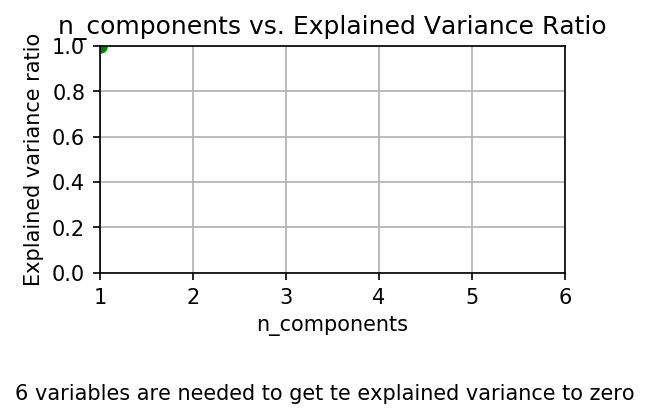

In [37]:
#plot the explained variance vs the number of components
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(components,explained_variance_ratio,marker='o', color='green')

plt.xlabel('n_components')
plt.xlim([1,6])

plt.ylabel('Explained variance ratio')
plt.ylim([0,1])

#add title 
plt.title('n_components vs. Explained Variance Ratio')


# Add figure caption
plt.figtext(0.5, -0.3, "6 variables are needed to get te explained variance to zero", ha='center')

plt.show()

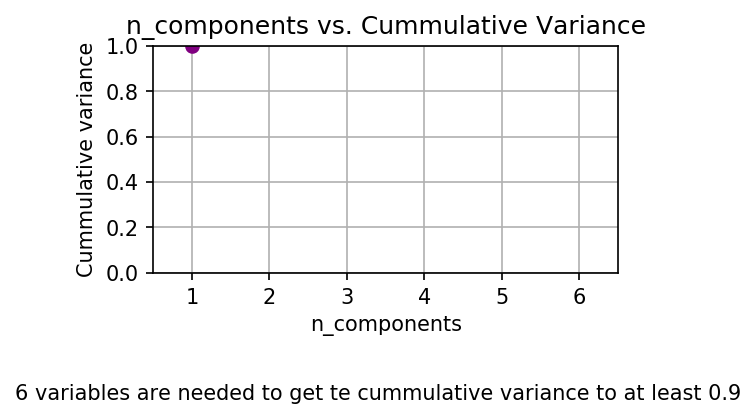

In [38]:
#plot the cummulative variance vs the number of components
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(components,cumulative_variance,marker='o', color='purple')

plt.xlabel('n_components')
plt.xlim([0.5,6.5])

plt.ylabel('Cummulative variance')
plt.ylim([0,1])

plt.title('n_components vs. Cummulative Variance')


# Add figure caption
plt.figtext(0.5, -0.3, "6 variables are needed to get te cummulative variance to at least 0.9", ha='center')

plt.show()

## PC1 and PC2  

In [39]:
# Get loadings for PC1 and PC2
loadings_pc1 = pca_6.components_[0]
loadings_pc2 = pca_6.components_[1]

# Create scatter plot of loadings PC1 and PC2
plt.scatter(loadings_pc1, loadings_pc2,color='green')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)  # Horizontal zero line
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)  # Vertical zero line
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.ylim([-0.9,0.6])
plt.ylim([-0.8,0.8])
plt.title('Loadings of PC1 and PC2')

#display the variables corresponding to the points in the plot
variables = pca_df.columns
for i, variable in enumerate(variables):
    plt.annotate(variable, (loadings_pc1[i], loadings_pc2[i]), color='blue',xytext=(6, 2), textcoords='offset points', ha='right', va='bottom')


# Add figure caption
plt.figtext(0.5, -0.1, "Loadings of PC1 and PC2, which represent the weights or coefficients" 
            "that define \n the relationship between the movement measurements and the principal components.", ha='center')

plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

## Scores


In [ ]:
#calculate the scores
scores = pca_6.transform(pca_df)

#see the scores of pc1 and pc2
scores_pc1 = scores[:, 0]
scores_pc2 = scores[:, 1]

print(scores_pc1, scores_pc2)

In [ ]:
#add the scores to the  dataframe and create a new dataframe

Pca_movement_df = scaled_df.copy()
Pca_movement_df['scores pc1'] = scores_pc1
Pca_movement_df['scores pc2'] = scores_pc2

Pca_movement_df.head()

In [ ]:
Pca_movement_df.columns

In [ ]:
# Create scatter plot of scores
plt.scatter(scores_pc1, scores_pc2, s=8)
plt.xlabel('PC1 Scores')
plt.ylabel('PC2 Scores')
plt.title('Score Plot: PC1 vs PC2')
plt.show()